# Flight Price Prediction

- Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records


### FEATURES:

- Airline: The name of the airline.

- Date_of_Journey: The date of the journey

- Source: The source from which the service begins.
 
- Destination: The destination where the service ends.

- Route: The route taken by the flight to reach the destination.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Additional_Info: Additional information about the flight

### Target

- Price: The price of the ticket

- We have to build a model to predict the price of a ticket.

 

In [1]:
#Importing necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [153]:
df = pd.read_excel(r'E:\Flight_Ticket_Participant_Datasets\Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Exploratory Data Analysis

In [3]:
#Checking shape 

df.shape

(10683, 11)

In [124]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

### There is one null value present in 'Route' and 'Total Stop'

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### All columns consists object data type instead of Price.

In [8]:
#Let's check coloumns value counts and uniqueness :

for i in df.columns:
    print (i,':',len(df[i].unique()))

Airline : 12
Date_of_Journey : 44
Source : 5
Destination : 6
Route : 129
Dep_Time : 222
Arrival_Time : 1343
Duration : 368
Total_Stops : 6
Additional_Info : 10
Price : 1870


In [11]:
df.value_counts(['Airline'])

Airline                          
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
dtype: int64

In [12]:
df.value_counts(['Source'])

Source  
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64

In [14]:
df.value_counts(['Destination'])

Destination
Cochin         4537
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64

In [15]:
df.value_counts(['Total_Stops'])

Total_Stops
1 stop         5625
non-stop       3491
2 stops        1520
3 stops          45
4 stops           1
dtype: int64

In [17]:
df.value_counts(['Additional_Info'])

Additional_Info             
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
dtype: int64

### Data Visualisation

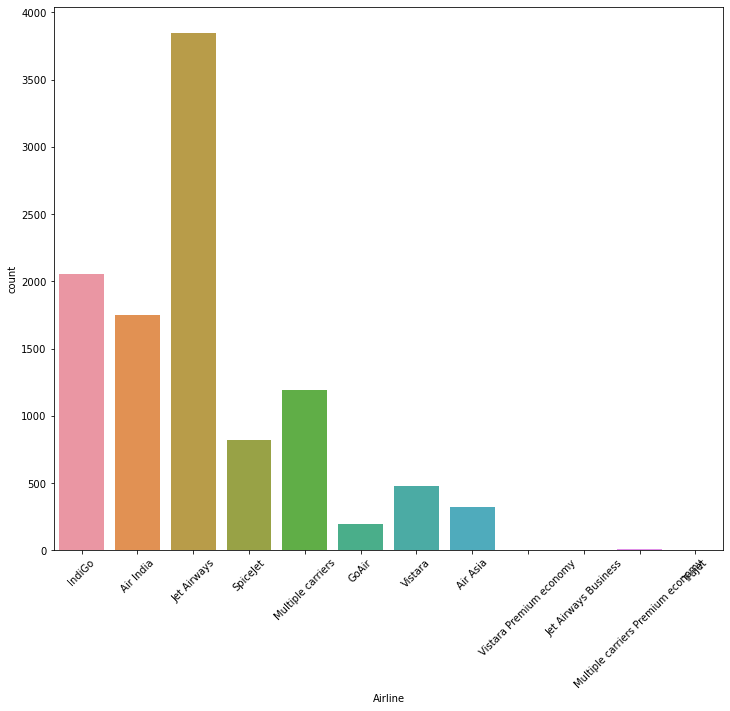

In [101]:
plt.figure(figsize=(12,10))
sns.countplot(x='Airline',data=df)
plt.xticks(rotation=45)
plt.show()

## Jet Airways has higher number of count in our Dataset which means 
## it dominated the Airline route as compared with other competitors.

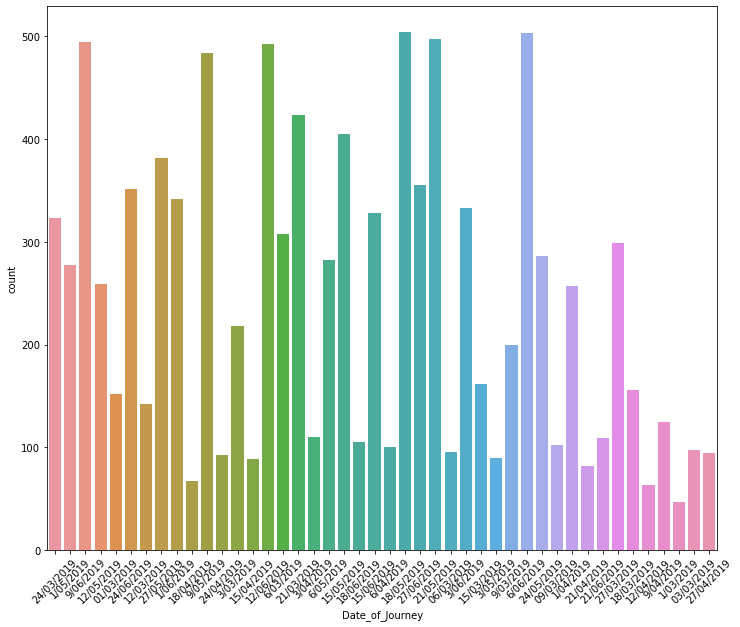

In [102]:
plt.figure(figsize=(12,10))
sns.countplot(x='Date_of_Journey',data=df)
plt.xticks(rotation=45)
plt.show()

### 9 June 2019,15 April 2019,6 April 2019,9 March 2019 are dates where travel occurs most.

<AxesSubplot:xlabel='Source', ylabel='count'>

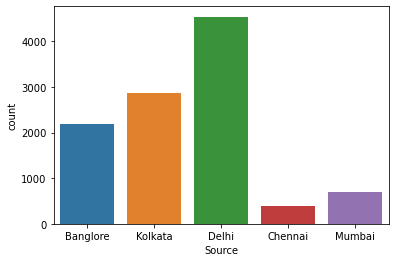

In [23]:
sns.countplot(df.Source)

<AxesSubplot:xlabel='Destination', ylabel='count'>

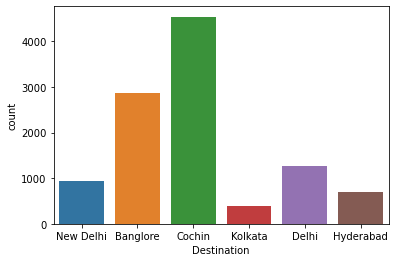

In [24]:
sns.countplot(df.Destination)

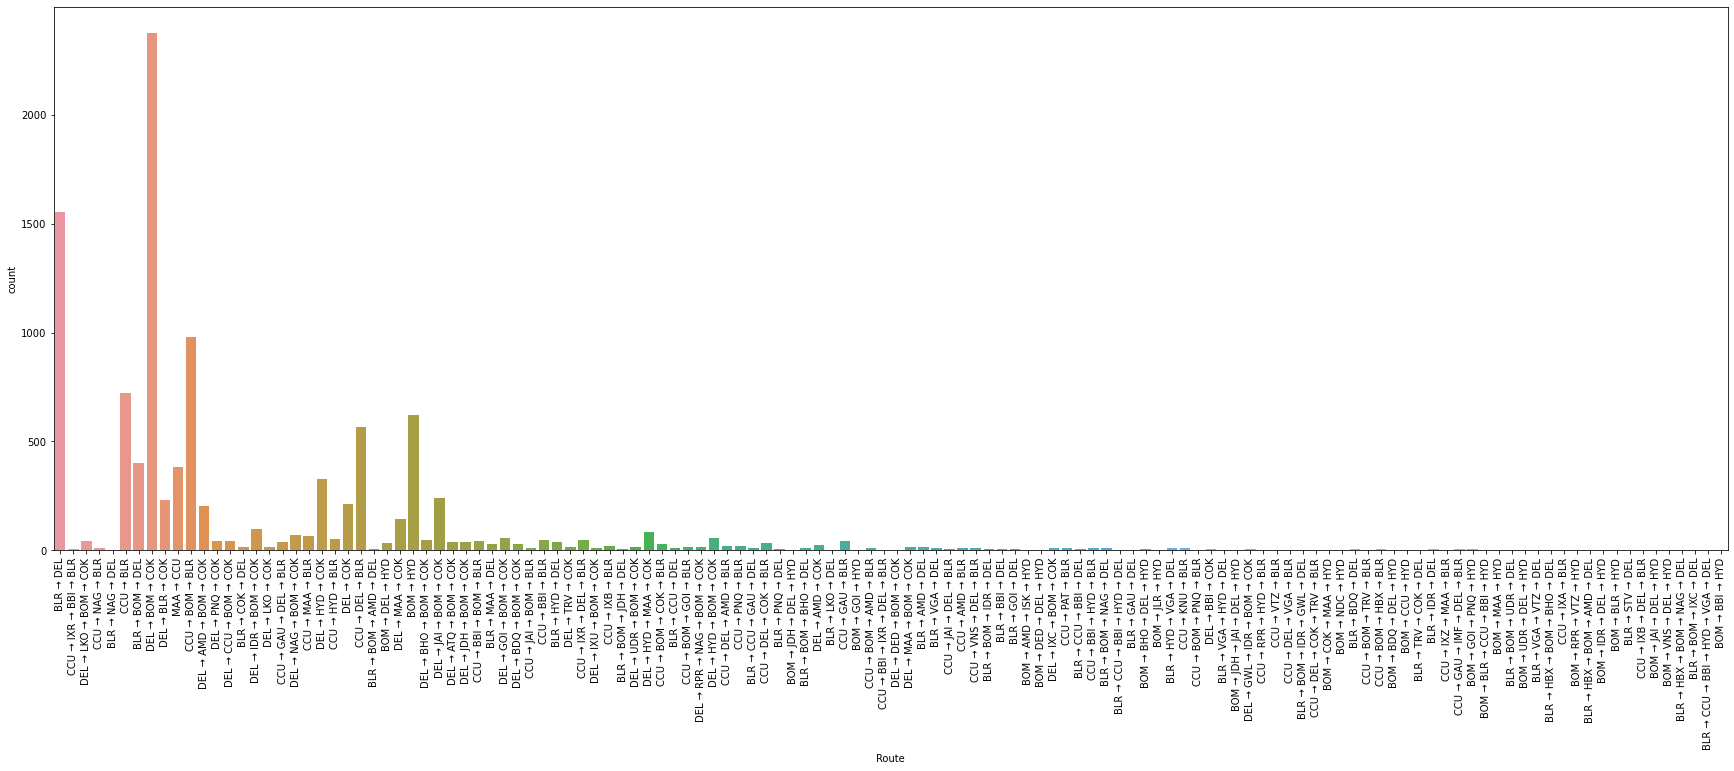

In [33]:
plt.figure(figsize=(30,10))
sns.countplot(x='Route' , data=df)
plt.xticks(rotation=90)
plt.show()

### DEL-BOM-COK is more busy route as compared with others.

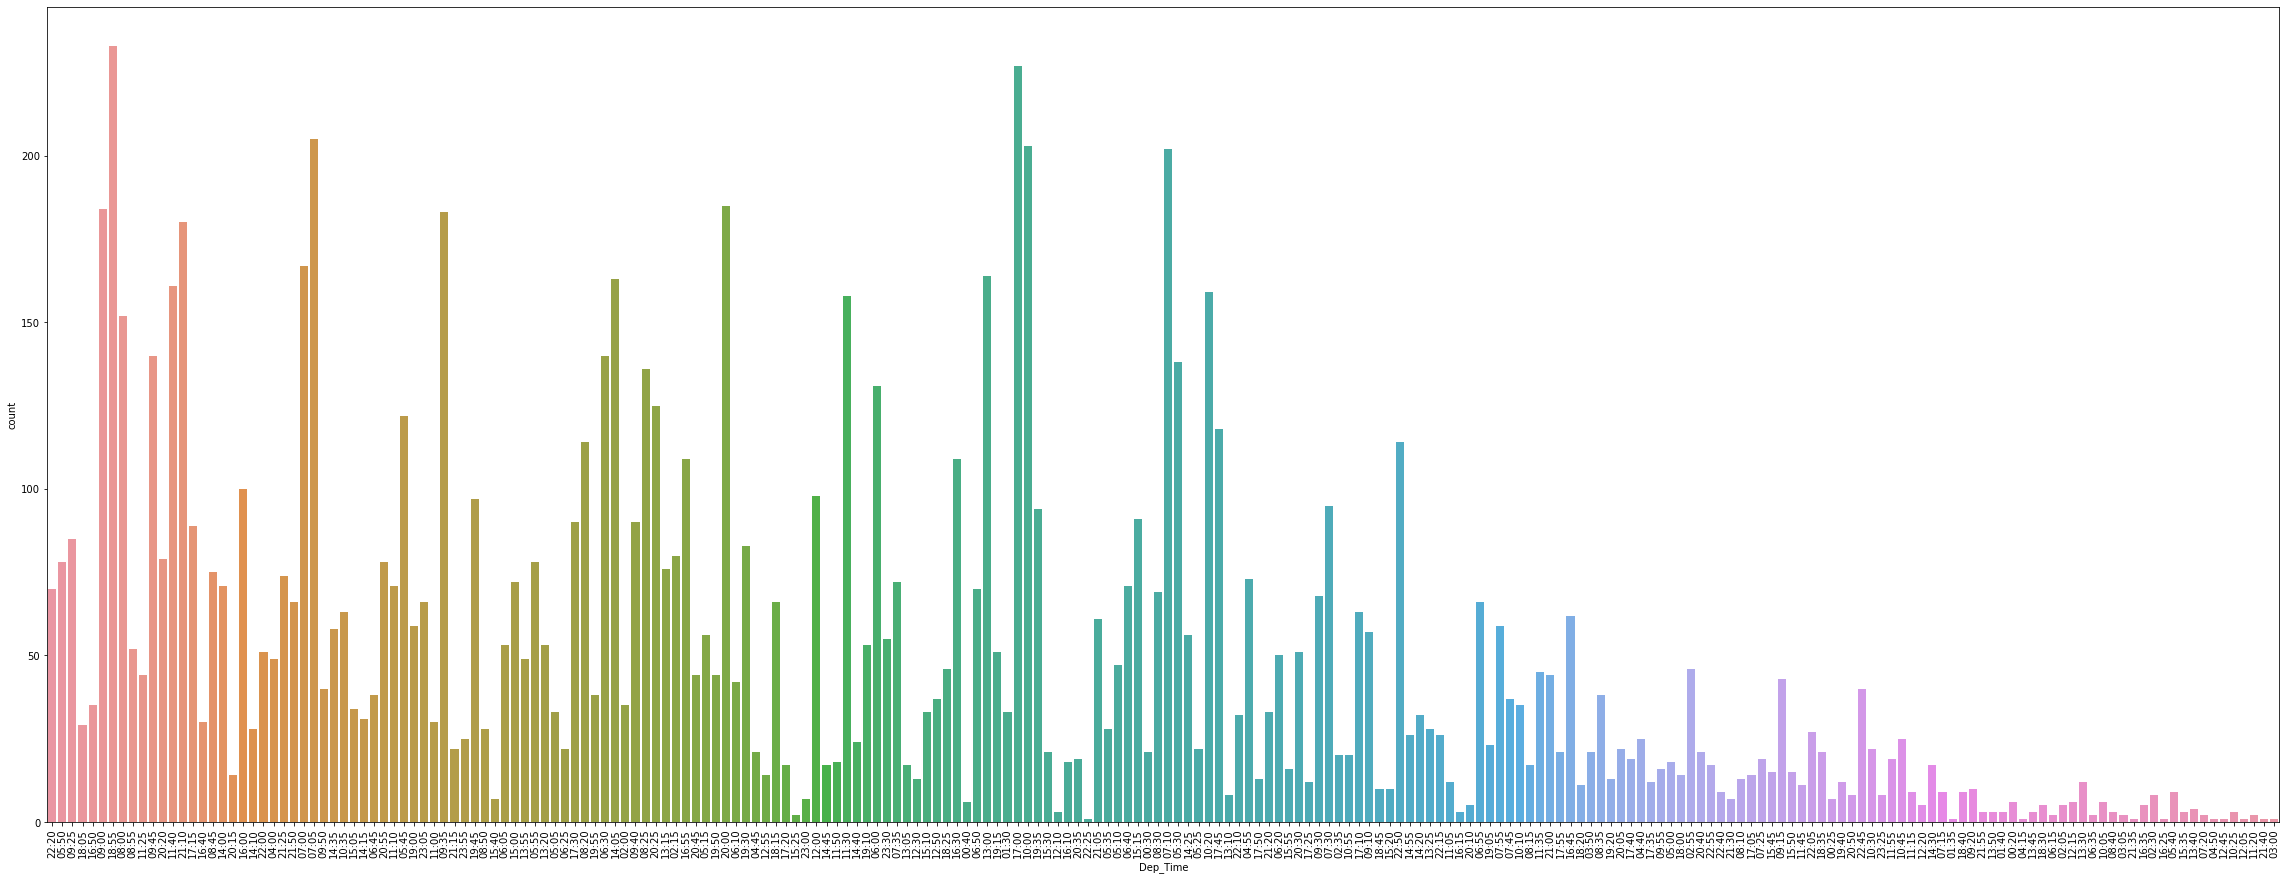

In [39]:
plt.figure(figsize=(40,15))
sns.countplot(x='Dep_Time' , data=df)
plt.xticks(rotation=90)
plt.show()

- Most no. of flights departed at 18:55PM

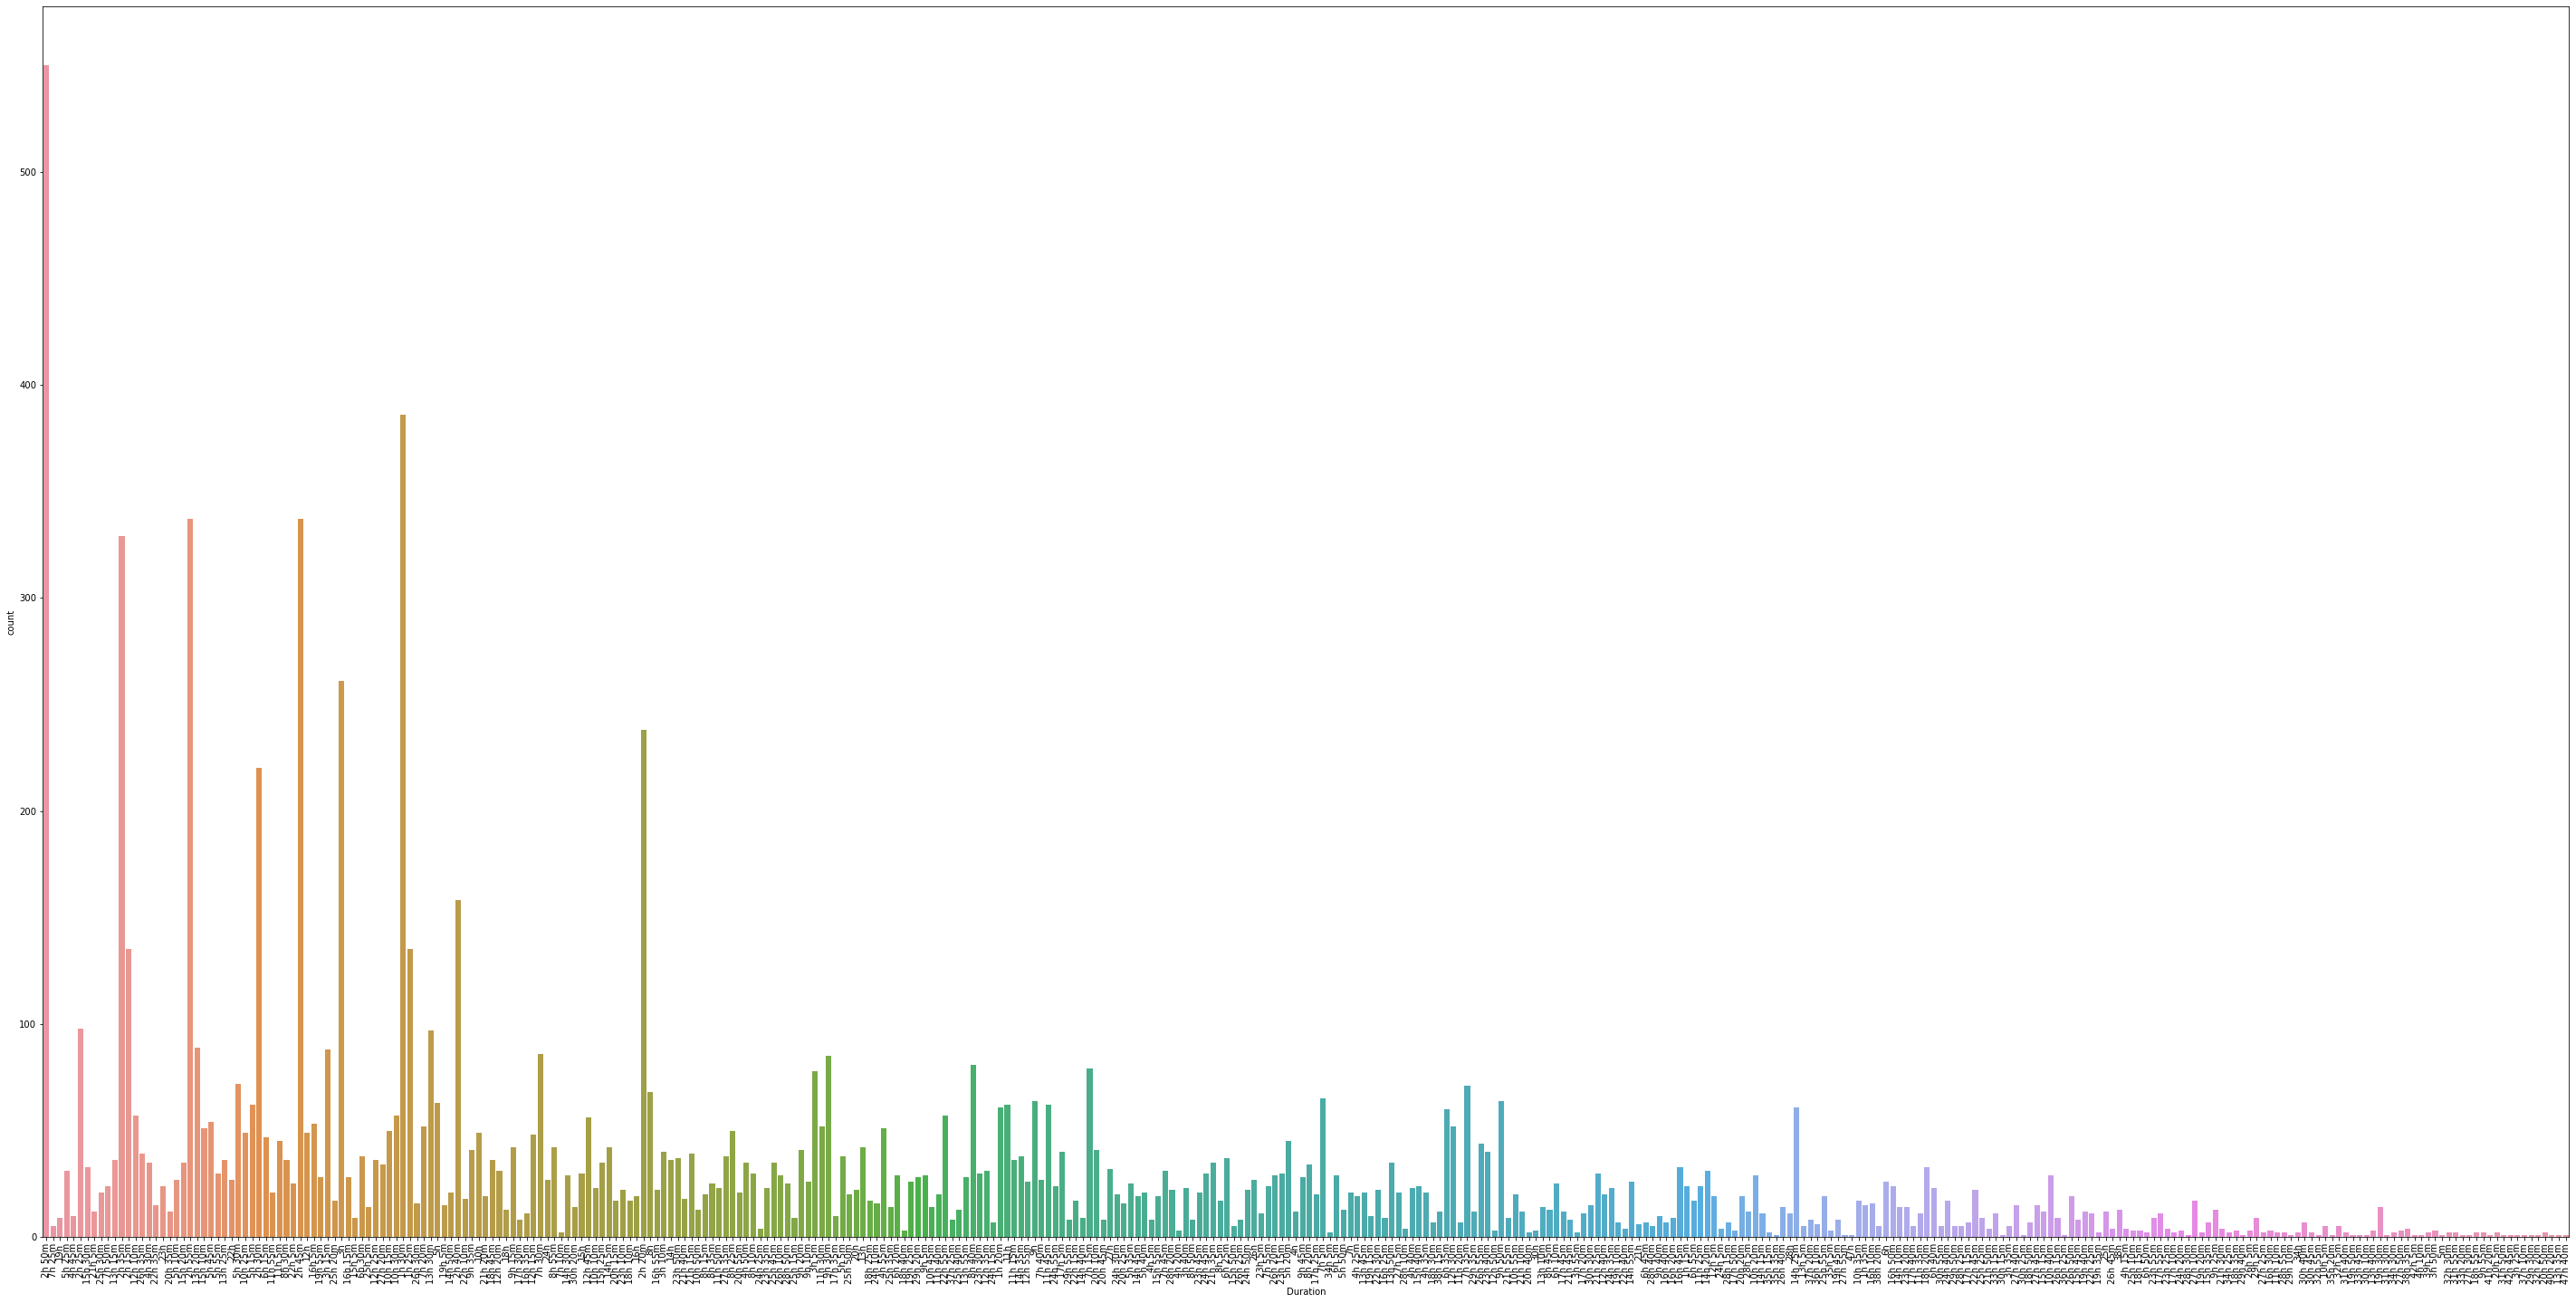

In [42]:
plt.figure(figsize=(50,25))
sns.countplot(x='Duration' , data=df)
plt.xticks(rotation=90)
plt.show()

- Most flights are having duration of 2 hr 50 mins

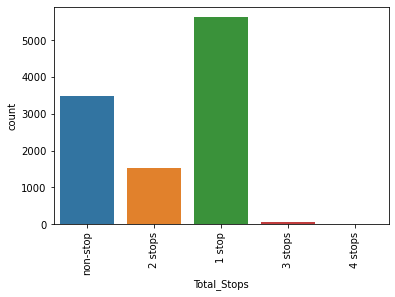

In [44]:
sns.countplot(x='Total_Stops' , data=df)
plt.xticks(rotation=90)
plt.show()

- Most no. of flights are consisting at least one stop in their travel.

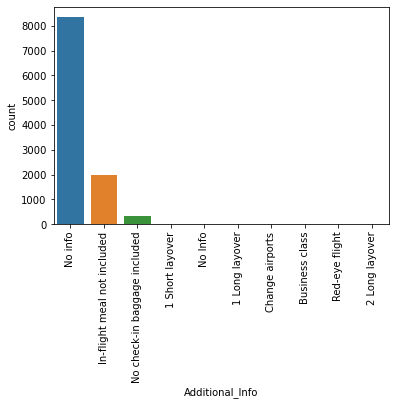

In [45]:
sns.countplot(x='Additional_Info' , data=df)
plt.xticks(rotation=90)
plt.show()

### No info. has covered most count so we can drop "Additional_Info"

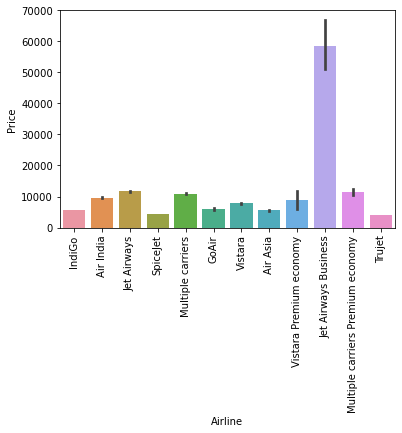

In [47]:
sns.barplot(x='Airline',y='Price' , data=df)
plt.xticks(rotation=90)
plt.show()

### Jet Airways Business Flight prices are very high among all.

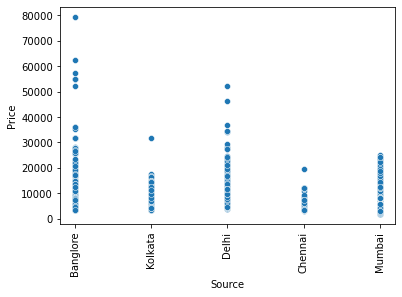

In [92]:
sns.scatterplot(x='Source',y='Price' , data=df)
plt.xticks(rotation=90)
plt.show()

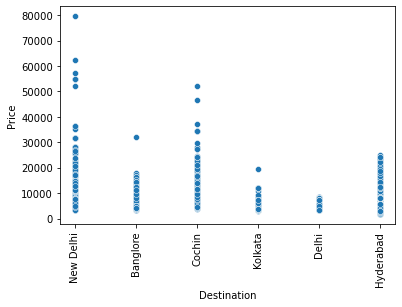

In [95]:
sns.scatterplot(x='Destination',y='Price' , data=df)
plt.xticks(rotation=90)
plt.show()

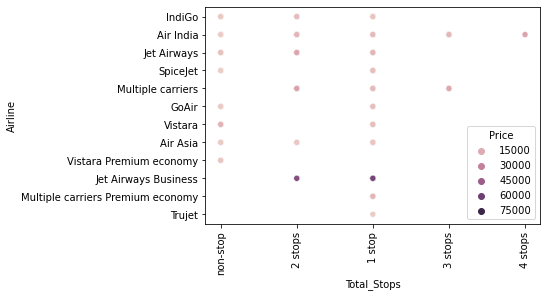

<Figure size 432x288 with 0 Axes>

In [118]:

sns.scatterplot(x='Total_Stops',y='Airline',hue='Price',data=df)
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

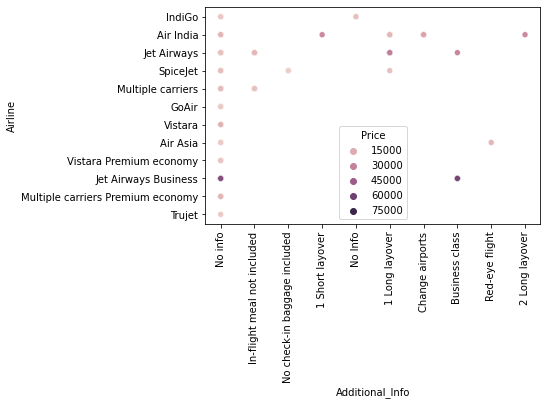

<Figure size 432x288 with 0 Axes>

In [117]:
sns.scatterplot(x='Additional_Info',y='Airline',hue='Price',data=df)
plt.xticks(rotation=90)
plt.show()
plt.tight_layout()

- Most of the Airlines include no information.

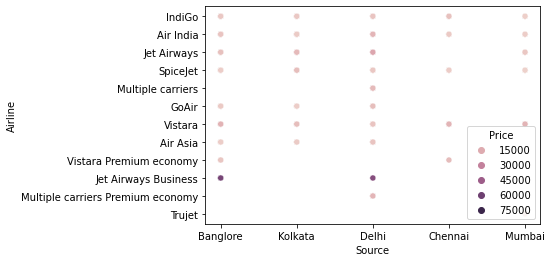

<Figure size 432x288 with 0 Axes>

In [119]:
sns.scatterplot(x='Source',y='Airline',hue='Price',data=df)
plt.show()
plt.tight_layout()

- IndiGo,AirIndia,Spicejet,Vistara runs from all Source cities i.e Banglore,Kolkata,Delhi,Chennai,Mumbai.

- JetAirways runs from all Source cities except 'Chennai'

- JetAirways Business runs from Banglore and Delhi only.

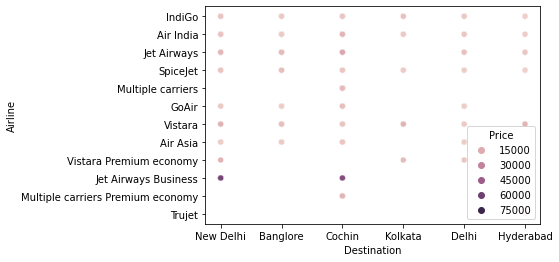

<Figure size 432x288 with 0 Axes>

In [120]:

sns.scatterplot(x='Destination',y='Airline',hue='Price',data=df)
plt.show()
plt.tight_layout()

### Jet Airways Business runs only for New Delhi and Cochin Destination and are at higher Prices.

# Data Preprocessing

In [154]:
#Dropping NaN row

df1=df.dropna()

In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [156]:
#Handling Object data

# Creating new features as day and month

df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'])

In [157]:
df1['Day']=df1['Date_of_Journey'].dt.day

In [158]:
df1['Month']=df1['Date_of_Journey'].dt.month

In [159]:
#Converting less informative airlines to our dataset into 'others'

df1['Airline'] = df1['Airline'].replace(['GoAir','Multiple carriers Premium economy' , 'Jet Airways Business' , 
                                         'Vistara Premium economy', 'Trujet'] , 'other' )

In [160]:
df1['Airline'].value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
other                 217
Name: Airline, dtype: int64

In [161]:
#Encoding Airline
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Airline'] = le.fit_transform(df1['Airline'])

In [162]:
#Encoding Source and Destination

# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = df1[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [163]:
Destination = df1[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [164]:
# As this is case of Ordinal Categorical type we perform LabelEncoder in Total Stops :
# Here Values are assigned with corresponding keys

df1.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [166]:
df2 = pd.concat([df1, Source, Destination], axis = 1)
df2.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day', 'Month', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [175]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df2["Dep_hour"] = pd.to_datetime(df2["Dep_Time"]).dt.hour

# Extracting Minutes
df2["Dep_min"] = pd.to_datetime(df2["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df2=df2.drop(["Dep_Time"], axis = 1)


# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
df2["Arrival_hour"] = pd.to_datetime(df2.Arrival_Time).dt.hour

# Extracting Minutes
df2["Arrival_min"] = pd.to_datetime(df2.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df2=df2.drop(["Arrival_Time"], axis = 1)

In [172]:
#Treating Duration

duration = list(df2["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [173]:
df2["Duration_hours"] = duration_hours
df2["Duration_mins"] = duration_mins

In [182]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Airline                10682 non-null  int32         
 1   Date_of_Journey        10682 non-null  datetime64[ns]
 2   Source                 10682 non-null  object        
 3   Destination            10682 non-null  object        
 4   Route                  10682 non-null  object        
 5   Duration               10682 non-null  object        
 6   Total_Stops            10682 non-null  int64         
 7   Additional_Info        10682 non-null  object        
 8   Price                  10682 non-null  int64         
 9   Day                    10682 non-null  int64         
 10  Month                  10682 non-null  int64         
 11  Source_Chennai         10682 non-null  uint8         
 12  Source_Delhi           10682 non-null  uint8         
 13  S

In [183]:
df2.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day', 'Month',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Dep_hour', 'Dep_min',
       'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [186]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [184]:
#Now dropping Unnecessary columns and columns that we have decoded

df3 = df2.drop(columns=['Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration','Additional_Info'],axis=1)
df3.head()

,Airline,Total_Stops,Price,Day,Month,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,2,0,3897,24,3,0,0,0,0,0,0,0,0,1,22,20,1,10,2,50
1,1,2,7662,5,1,0,0,1,0,0,0,0,0,0,5,50,13,15,7,25
2,3,2,13882,6,9,0,1,0,0,1,0,0,0,0,9,25,4,25,19,0
3,2,1,6218,5,12,0,0,1,0,0,0,0,0,0,18,5,23,30,5,25
4,2,1,13302,3,1,0,0,0,0,0,0,0,0,1,16,50,21,35,4,45


In [192]:
#Checking Stats
df3.describe()

,Airline,Total_Stops,Price,Day,Month,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,2.871279,0.824190,9087.214567,12.682925,5.534731,0.035667,0.424640,0.268770,0.065250,0.424640,0.118424,0.065250,0.035667,0.087250,12.491013,24.409287,13.349186,24.690601,10.244898,28.326624
std,1.499056,0.675229,4611.548810,8.803800,2.987626,0.185468,0.494311,0.443341,0.246978,0.494311,0.323124,0.246978,0.185468,0.282214,5.748820,18.767801,6.859317,16.506808,8.494916,16.945817
min,0.000000,0.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,5277.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,3.000000,1.000000,8372.000000,6.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,1.000000,12373.000000,21.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,7.000000,4.000000,79512.000000,27.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


<AxesSubplot:>

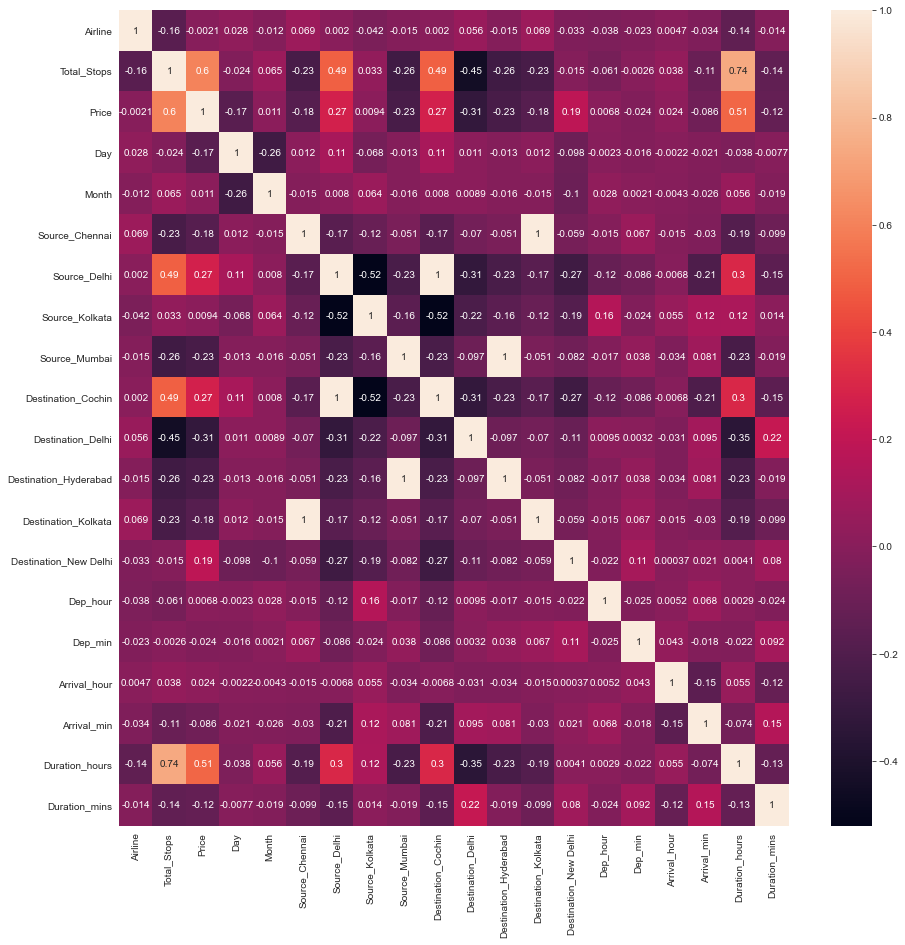

In [194]:
#HeatMap
sns.set_style("darkgrid")
plt.figure(figsize=(15,15))
corr = df3.corr()
sns.heatmap(corr, annot=True)

- Correlation near or equal to 1 means features are highly correlated with each other.

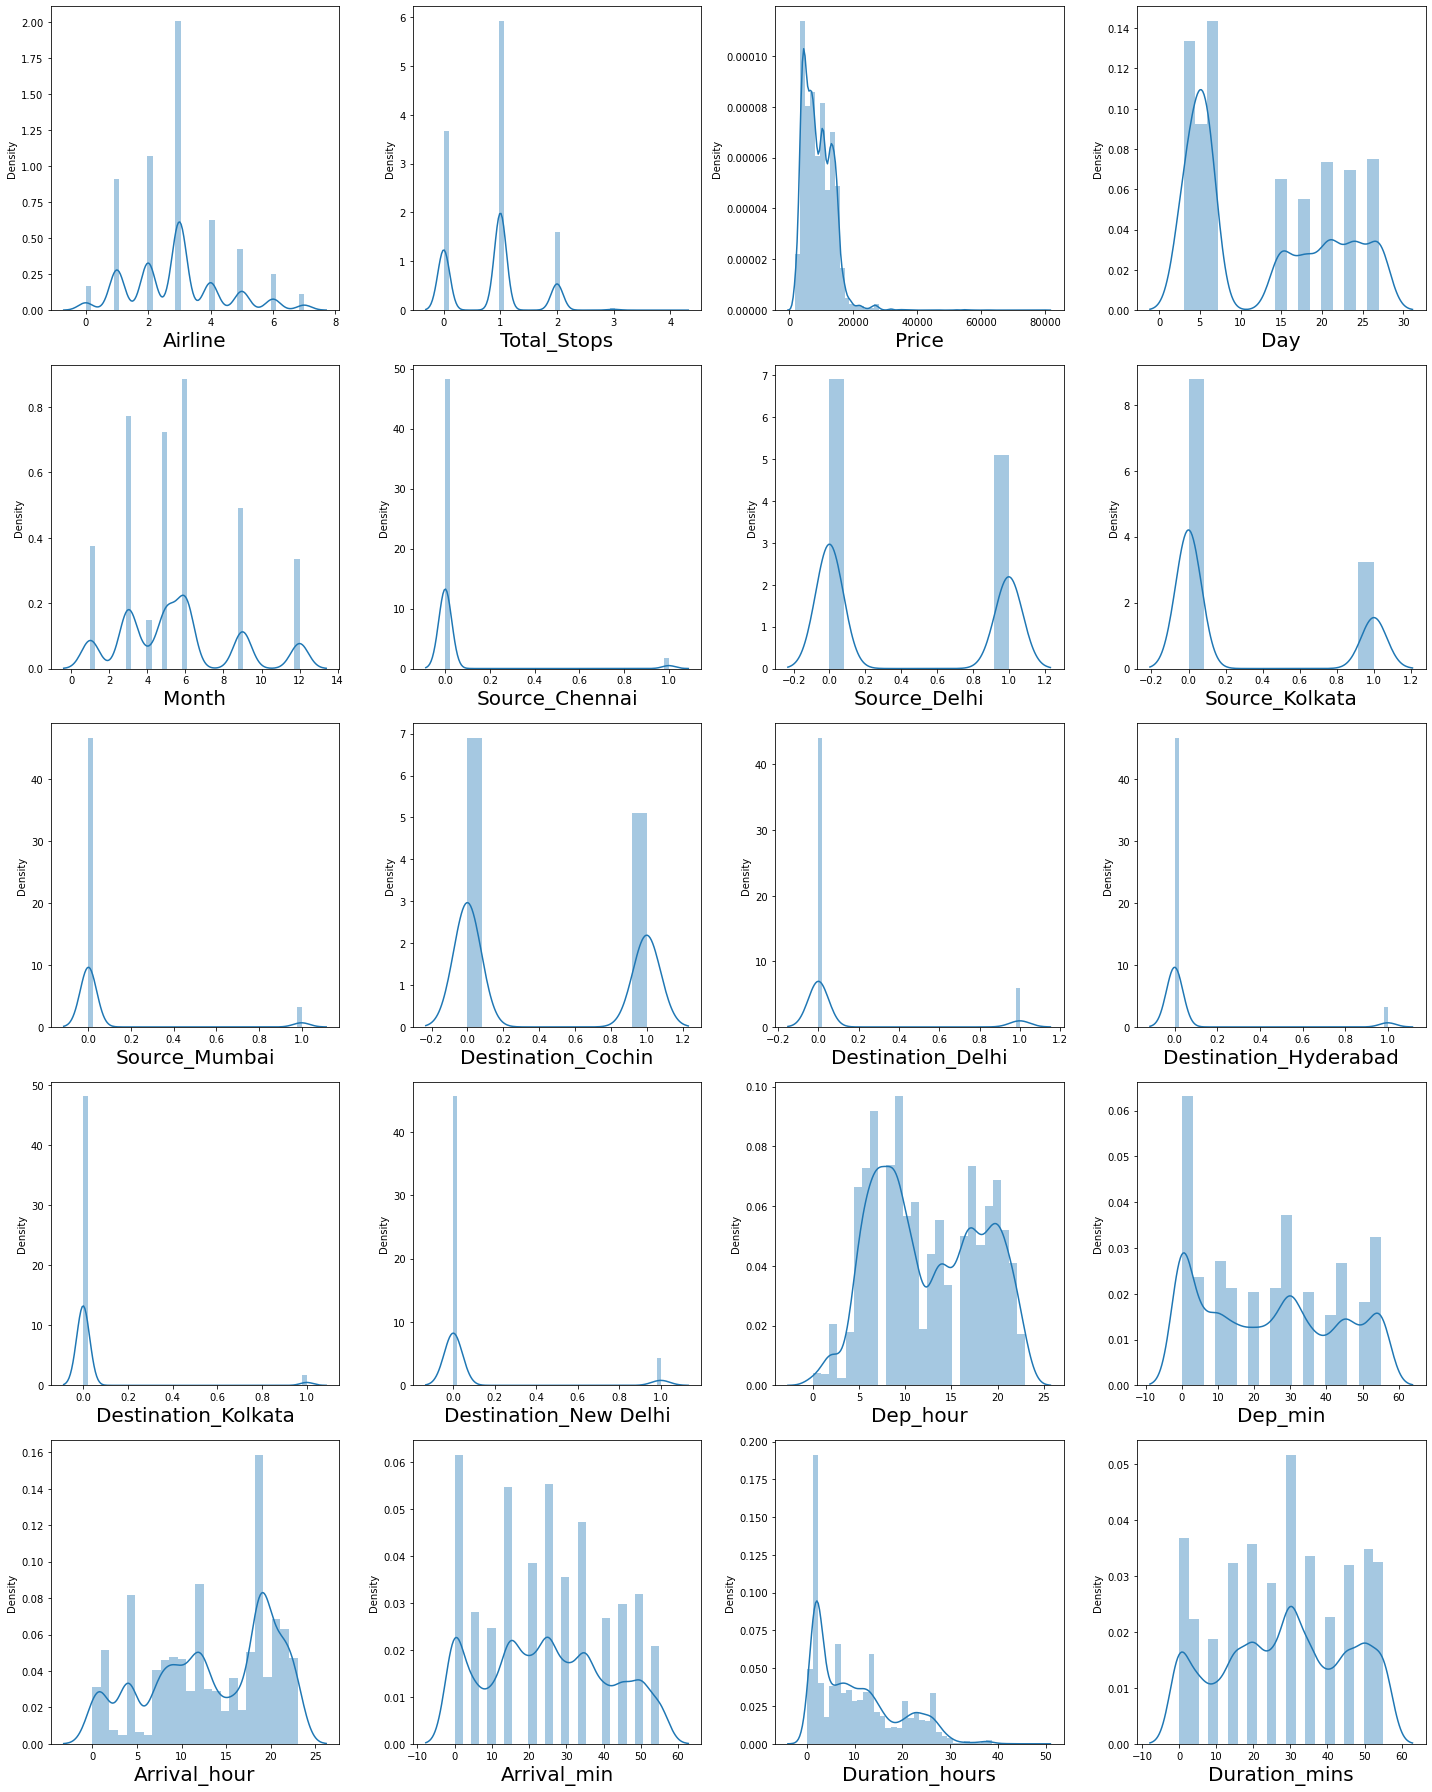

In [187]:
#Visualising Data Distribution and removing Ouliers

plt.figure(figsize=(20,25))

plotnumber=1

for column in df3:
    if plotnumber<=20 : 
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(df3[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

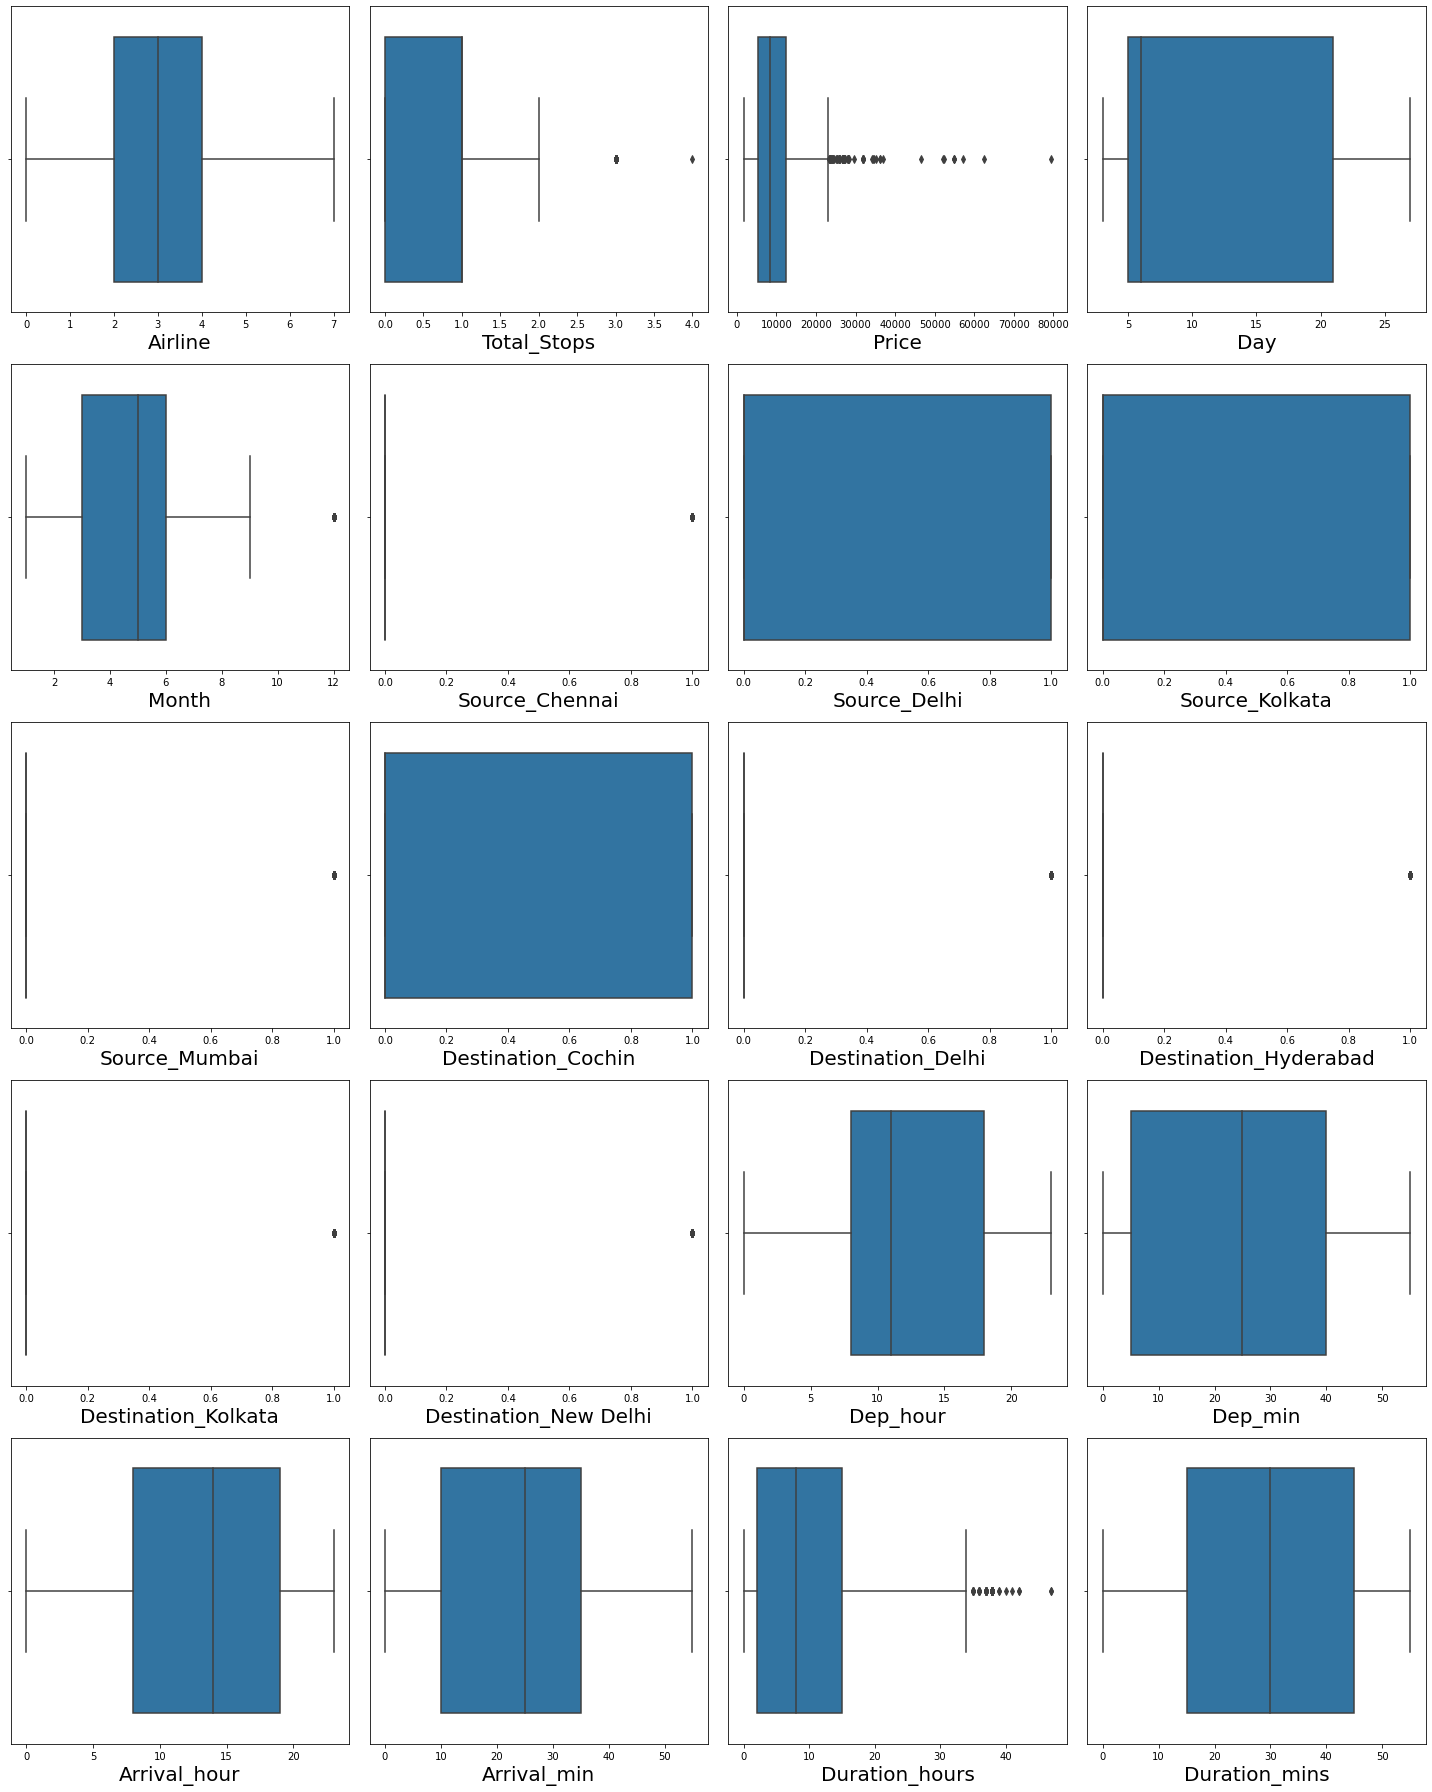

In [190]:
plt.figure(figsize=(20,25))

plotnumber=1

for column in df3:
    if plotnumber<=20 : 
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(df3[column])
        plt.xlabel(column , fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

- There are outliers present in our dataset so we need to treat them.

In [195]:
#Removing ouliers :

from scipy import stats
z=np.abs(stats.zscore(df3))
print(z)
print('row no. : ',np.where(z>3)[0])

[[0.58124554 1.22066609 1.12553455 ... 0.8900139  0.97061397 1.27904078]
 [1.24836329 1.74143186 0.30906781 ... 0.5870944  0.38199906 0.19631866]
 [0.08587221 1.74143186 1.03978296 ... 0.0187446  1.03067671 1.67167809]
 ...
 [0.08587221 1.22066609 0.40296691 ... 0.2841749  0.85289099 1.67167809]
 [2.08722545 1.22066609 0.77218138 ... 0.8900139  0.97061397 0.688897  ]
 [1.24836329 1.74143186 0.57809433 ... 0.5870944  0.26427608 0.49139054]]
row no. :  [    0     4     6 ... 10674 10674 10680]


In [197]:
index = (np.where(z>3)[0])
df4=df3.drop(df3.index[index])
df4.shape
#Checking Shape after cleaning outliers

(8573, 20)

In [198]:
#Skewness
df4.skew()

Airline                  0.479068
Total_Stops              0.086135
Price                    0.322043
Day                      0.353451
Month                    0.583779
Source_Chennai           0.000000
Source_Delhi            -0.076823
Source_Kolkata           0.707602
Source_Mumbai            0.000000
Destination_Cochin      -0.076823
Destination_Delhi        1.987852
Destination_Hyderabad    0.000000
Destination_Kolkata      0.000000
Destination_New Delhi    0.000000
Dep_hour                 0.084749
Dep_min                  0.250285
Arrival_hour            -0.407757
Arrival_min              0.104292
Duration_hours           0.661902
Duration_mins           -0.134111
dtype: float64

- Data seems to be alright we are good to move ahead for Model Instantiation and Training

## Model Instantiation and Training

In [199]:
#Scaling feature data

x = df4.drop(columns=['Price'],axis=1)
y = df4['Price']

Scalar = StandardScaler()
X = Scalar.fit_transform(x)

In [214]:
#Splitting Data into Train and Test

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [222]:
result=[]
#To save model scores

In [204]:
#Importing Regression Models

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Linear Regression

In [223]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_lr_pred=lr.predict(x_test)
r2_lr=r2_score(y_test,y_lr_pred)

print("R2 SCORE :",r2_lr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_lr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_lr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_lr_pred)))

result.append(r2_lr)


R2 SCORE : 0.47216523511531483
Mean Squared Error :  7601178.035593775
Mean Absolute Error :  2207.644044284835
Root Mean squared Error :  2757.023401350408


## Random Forest Regressor

In [224]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
y_rfr_pred=rfr.predict(x_test)
r2_rfr=r2_score(y_test,y_rfr_pred)

print("R2 SCORE :",r2_rfr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_rfr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_rfr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_rfr_pred)))

result.append(r2_rfr)

R2 SCORE : 0.7927401464409918
Mean Squared Error :  2984682.2364519583
Mean Absolute Error :  1125.3959647068702
Root Mean squared Error :  1727.6232912449284


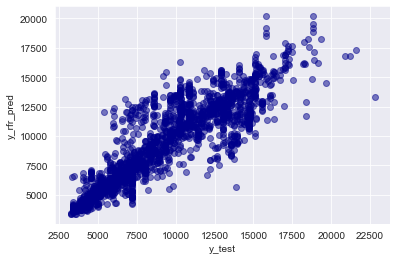

In [233]:
plt.scatter(y_test,y_rfr_pred,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_rfr_pred")
plt.show()

## Gradient Boosting Regressor

In [225]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_gbr_pred=gbr.predict(x_test)
r2_gbr=r2_score(y_test,y_gbr_pred)

print("R2 SCORE :",r2_gbr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_gbr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_gbr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_gbr_pred)))

result.append(r2_gbr)

R2 SCORE : 0.7585543979149667
Mean Squared Error :  3476980.163973127
Mean Absolute Error :  1400.9577605200284
Root Mean squared Error :  1864.6662339338714


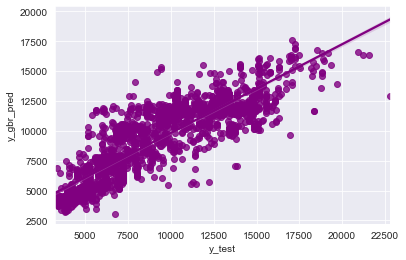

In [236]:
sns.regplot(y_test,y_gbr_pred,color="Purple")
plt.xlabel("y_test")
plt.ylabel("y_gbr_pred")
plt.show()

## Decision Tree Regressor

In [226]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_dtr_pred=dtr.predict(x_test)
r2_dtr=r2_score(y_test,y_dtr_pred)

print("R2 SCORE :",r2_dtr)
print("Mean Squared Error : ",mean_squared_error(y_test,y_dtr_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_dtr_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_dtr_pred)))

result.append(r2_dtr)

R2 SCORE : 0.6889757083548071
Mean Squared Error :  4478960.408577944
Mean Absolute Error :  1301.7564210199005
Root Mean squared Error :  2116.355454213196


## Ridge

In [227]:
rg=Ridge(alpha=0.001)
rg.fit(x_train,y_train)
y_rg_pred=rg.predict(x_test)
r2_rg=r2_score(y_test,y_rg_pred)

print("R2 SCORE :",r2_rg)
print("Mean Squared Error : ",mean_squared_error(y_test,y_rg_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_rg_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_rg_pred)))

result.append(r2_rg)

R2 SCORE : 0.47236628283315973
Mean Squared Error :  7598282.81231813
Mean Absolute Error :  2202.3042004595454
Root Mean squared Error :  2756.4982881036094


## Lasso

In [228]:
ls=Lasso(alpha=0.0002)
ls.fit(x_train,y_train)
y_ls_pred=rg.predict(x_test)
r2_ls=r2_score(y_test,y_ls_pred)

print("R2 SCORE :",r2_ls)
print("Mean Squared Error : ",mean_squared_error(y_test,y_ls_pred))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_ls_pred))
print("Root Mean squared Error : ",np.sqrt(mean_squared_error(y_test,y_ls_pred)))

result.append(r2_ls)


R2 SCORE : 0.47236628283315973
Mean Squared Error :  7598282.81231813
Mean Absolute Error :  2202.3042004595454
Root Mean squared Error :  2756.4982881036094


## Cross Validation

In [219]:
cvlr=cross_val_score(rfr,x,y,cv=5)
cvrfr=cross_val_score(rfr,x,y,cv=5)
cvdtr=cross_val_score(dtr,x,y,cv=5)
cvsvr=cross_val_score(svr,x,y,cv=5)
cvgbr=cross_val_score(gbr,x,y,cv=5)
cvrg=cross_val_score(rg,x,y,cv=5)
cvls=cross_val_score(ls,x,y,cv=5)

print("CV SCORE LR : " , cvlr.mean())
print("CV SCORE RFR : " , cvrfr.mean())
print("CV SCORE DTR : " , cvdtr.mean())
print("CV SCORE SVR : " , cvsvr.mean())
print("CV SCORE GBR : " , cvgbr.mean())
print("CV SCORE Ridge : " , cvrg.mean())
print("CV SCORE Lasso : " , cvls.mean())

CV SCORE LR :  0.7919526760400699
CV SCORE RFR :  0.7920009729395037
CV SCORE DTR :  0.6931275147420608
CV SCORE SVR :  0.011456848357642557
CV SCORE GBR :  0.7618114183423028
CV SCORE Ridge :  0.47280511911103124
CV SCORE Lasso :  0.47280511932199853


In [229]:
# Creating Dataframe

models = pd.DataFrame({"ML Models":["Linear Regression","Random Forest","Gradient Boosting",
                                   "Decision Tree","Ridge","Lasso"],"Scores":result})

In [230]:
models

,ML Models,Scores
0,Linear Regression,0.472165
1,Random Forest,0.792740
2,Gradient Boosting,0.758554
3,Decision Tree,0.688976
4,Ridge,0.472366
5,Lasso,0.472366


## As per R2 Score Random Forest Regressor is best fit model.

## Hyper parameter Tuning to be done on Random Forest Regressor

In [238]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [245]:
#Defining Parameters

params = {'bootstrap':[True],     
    'n_estimators':(100,200,300),
          'max_depth': (1,2),
          'n_jobs':[-1]
}

In [246]:
grid_cv = GridSearchCV(RandomForestRegressor(),param_grid=params,cv=5)

#Using 5 fold cross validation
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': (1, 2),
                         'n_estimators': (100, 200, 300), 'n_jobs': [-1]})

In [247]:
#Getting Best Parameters
grid_cv.best_params_

{'bootstrap': True, 'max_depth': 2, 'n_estimators': 100, 'n_jobs': -1}

In [276]:
#Applying best Parameters

rfr_t=RandomForestRegressor(bootstrap=True,max_depth=None,n_jobs=1,n_estimators=100)
rfr_t.fit(x_train,y_train)
y_rfrt_pred=rfr_t.predict(x_test)
r2_rfrt=r2_score(y_test,y_rfrt_pred)

print("R2 SCORE :",r2_rfrt)

R2 SCORE : 0.7936168194122033


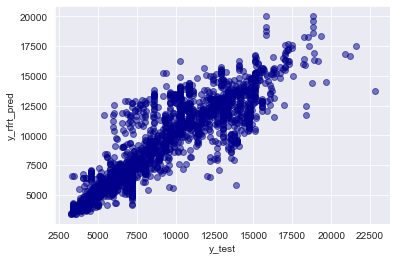

In [264]:
plt.scatter(y_test,y_rfrt_pred,alpha =0.5,color="DarkBlue")
plt.xlabel("y_test")
plt.ylabel("y_rfrt_pred")
plt.show()

- Plot shows graph is linear and predicted and actual data points are very close to each other.

## Efficiency Achieved

- R2 score is increased by hyperparameter tuning.
- R2 SCORE : 0.7936168194122033

## Model Saving

In [277]:
import joblib
joblib.dump(rfr_t,'Flight_price.pkl')

['Flight_price.pkl']

## Conclusion

- Random Forest and Gradient Boosting found to be best working models on this dataset.